## 6.5 Unsupervised Machine Learning - Custering:

## 1.  Importing libraries

## 2. Cleaning Data

## 3.The elbow technique

## 4. Decison about the number of clusters

## 5. Run the k-means algorithm

## 6. Attach a new column to the dataframe with the resulting clusters

## 7. Create visualizations using clustered data

## 8. Discuss how and why the cluster make sense

## 9. Descriptive statistics for clusters using the groupby() function. Discuss the findings

## 10. Propose what these results could be useful for in future steps of an analytics pipeline

## 1. Importing libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [14]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [15]:
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\6. Advanced Analytics and Dashboard Design\Hotel Bookings Analysis'

In [16]:
# Import the booking data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hotel_bookings_cleaned_countries.csv'), index_col = False)

## 2. Cleaning Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.1                    119390 non-null  int64  
 1   Unnamed: 0                      119390 non-null  int64  
 2   index                           119390 non-null  int64  
 3   hotel                           119390 non-null  object 
 4   is_canceled                     119390 non-null  int64  
 5   lead_time                       119390 non-null  int64  
 6   arrival_date_year               119390 non-null  int64  
 7   arrival_date_month              119390 non-null  object 
 8   arrival_date_week_number        119390 non-null  int64  
 9   arrival_date_day_of_month       119390 non-null  int64  
 10  stays_in_weekend_nights         119390 non-null  int64  
 11  stays_in_week_nights            119390 non-null  int64  
 12  adults          

In [18]:
# Delete the categorical columns
df.drop(['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status','reservation_status_date', 'country_name', 'children'], axis =1, inplace = True)

In [19]:
df.shape

(119390, 20)

In [33]:
# Delete the outlier of avg_daily_price
no_outlier=df[df['avg_daily_price'] <=5000]

## 3.The elbow technique

In [34]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(no_outlier).score(no_outlier) for i in range(len(kmeans))] 

score

C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\35196\anaconda3\Lib\site-packages\sklearn\clust

[-425446767010376.0,
 -106362210621398.19,
 -47273858861635.02,
 -26593891025479.24,
 -17021938753189.146,
 -11823306954344.95,
 -8686160771929.177,
 -6650372182213.293,
 -5256752818667.369]

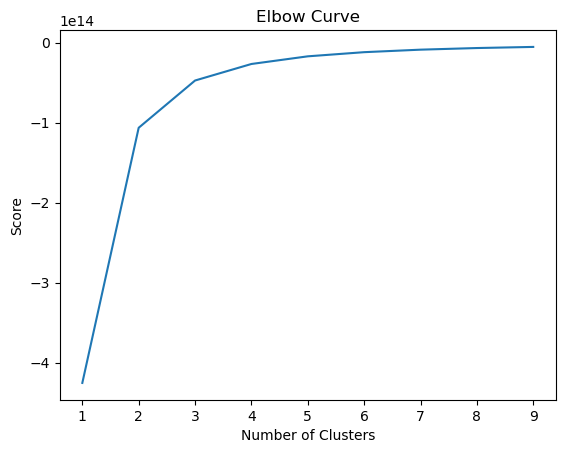

In [36]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Decison about the number of clusters

In the plot above there's a big jump from two to three on the x-axis, but after three the curve straightens out.This means the optimal number of clusters is three.

## 5. Run the k-means algorithm

In [37]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [39]:
# Fit the k-means object to the data.
kmeans.fit(no_outlier)

C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## 6. Attach a new column to the dataframe with the resulting clusters

In [40]:
no_outlier['clusters'] = kmeans.fit_predict(no_outlier)

C:\Users\35196\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\35196\AppData\Local\Temp\ipykernel_7132\454458931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier['clusters'] = kmeans.fit_predict(no_outlier)


In [41]:
no_outlier.head()

,Unnamed: 0.1,Unnamed: 0,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,avg_daily_price,required_car_parking_spaces,total_of_special_requests,clusters
0,0,0,0,0,342,2015,27,1,0,0,...,0,0,0,0,3,0,0.0,0,0,1
1,1,1,1,0,737,2015,27,1,0,0,...,0,0,0,0,4,0,0.0,0,0,1
2,2,2,2,0,7,2015,27,1,0,1,...,0,0,0,0,0,0,75.0,0,0,1
3,3,3,3,0,13,2015,27,1,0,1,...,0,0,0,0,0,0,75.0,0,0,1
4,4,4,4,0,14,2015,27,1,0,2,...,0,0,0,0,0,0,98.0,0,1,1


In [42]:
no_outlier['clusters'].value_counts()

clusters
0    39824
2    39788
1    39777
Name: count, dtype: int64

## 7. Create visualizations using clustered data

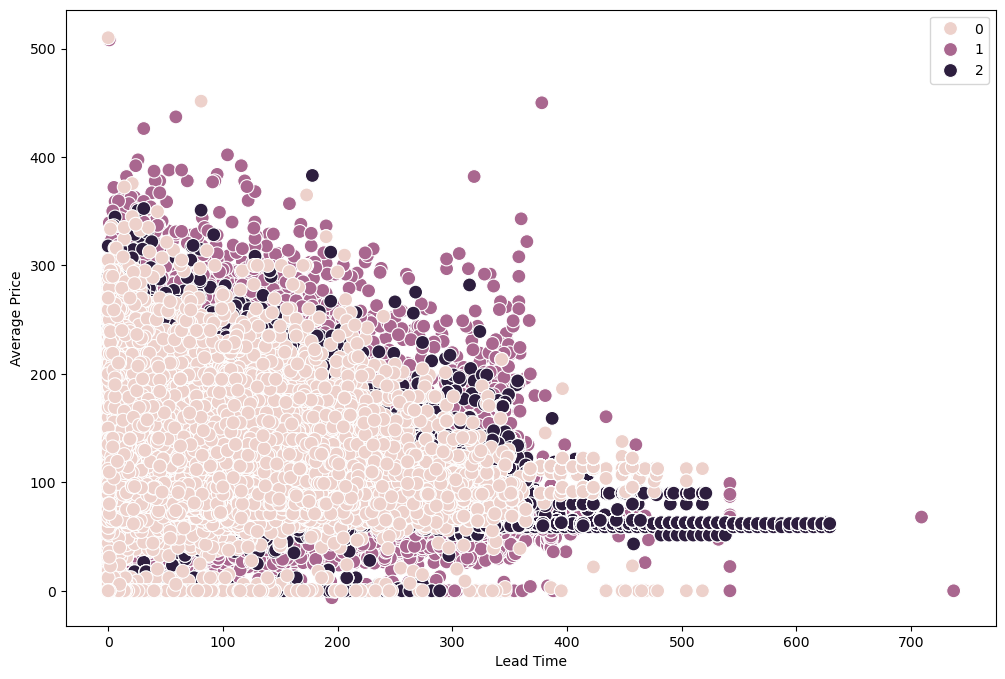

In [44]:
# Plot the clusters for the "lead_time" and "avg_daily_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=no_outlier['lead_time'], y=no_outlier['avg_daily_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lead Time') # Label x-axis.
plt.ylabel('Average Price') # Label y-axis.
plt.show()

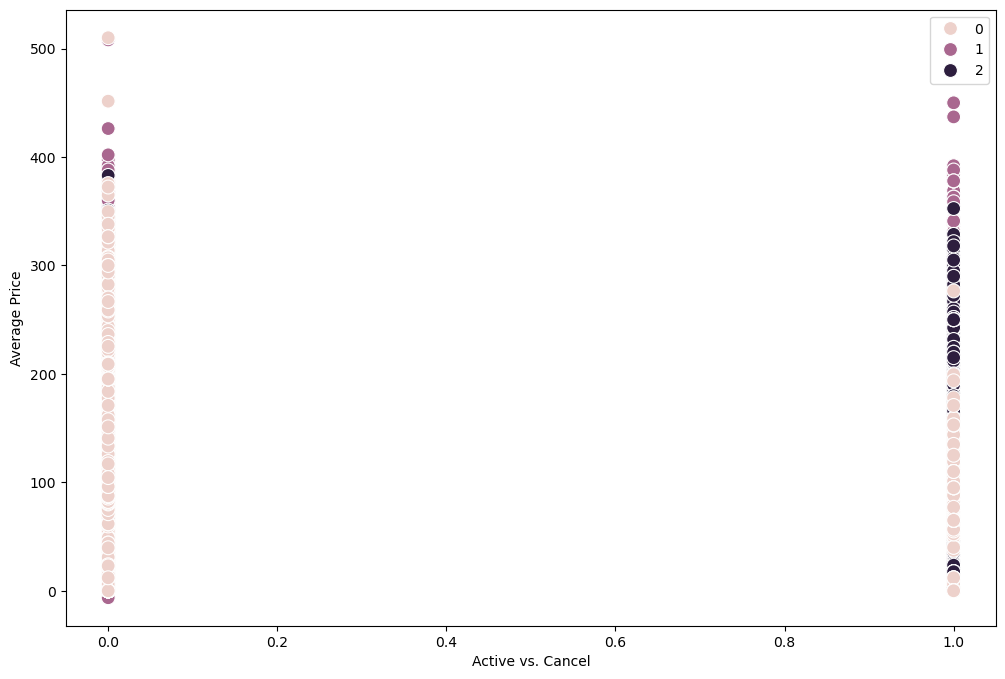

In [45]:
# Plot the clusters for the "is_canceled" and "avg_daily_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=no_outlier['is_canceled'], y=no_outlier['avg_daily_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Active vs. Cancel') # Label x-axis.
plt.ylabel('Average Price') # Label y-axis.
plt.show()

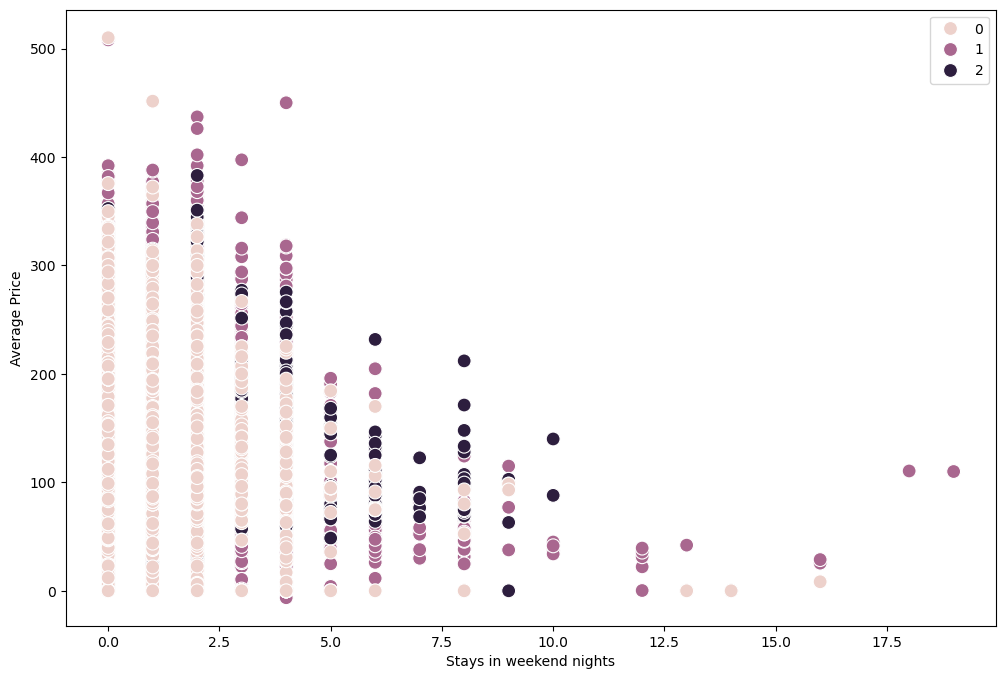

In [46]:
# Plot the clusters for the "stays_in_weekend_nights" and "avg_daily_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=no_outlier['stays_in_weekend_nights'], y=no_outlier['avg_daily_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Stays in weekend nights') # Label x-axis.
plt.ylabel('Average Price') # Label y-axis.
plt.show()

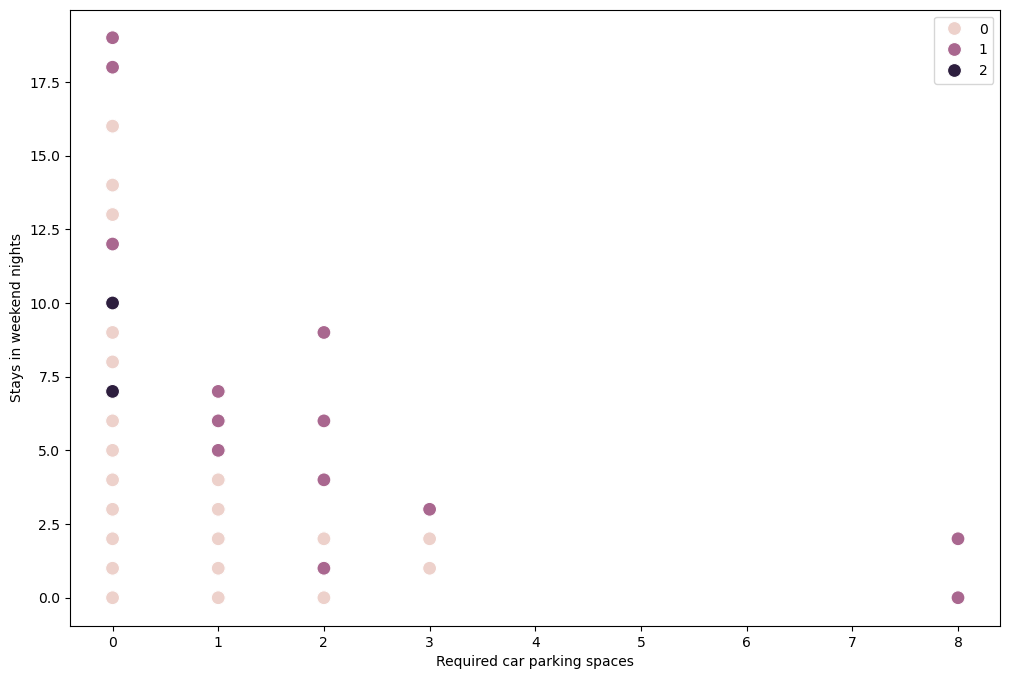

In [49]:
# Plot the clusters for the "stays_in_weekend_nights" and "avg_daily_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=no_outlier['required_car_parking_spaces'], y=no_outlier['stays_in_weekend_nights'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Required car parking spaces') # Label x-axis.
plt.ylabel('Stays in weekend nights') # Label y-axis.
plt.show()

## 8. Discuss how and why the cluster make sense

The goal of clustering is to locate groups of similar objects, data points in a meaningful way in order to identify similar subgroups within the data.
The elbow technique indicated 3 clusters.
Applying the k-means the 3 clusters have similar number of observations around 1/3 of the total observations each.

In all scatterplots is not possible to see clearly the 3 subgroups.

In the first scatterplot ("lead_time" and "avg_daily_price") there is overlap that highlight the average price is affect for other variables and not only due to lead time.

In the second scatterplot ("is_canceled" and "avg_daily_price") looks like the profile/characteristics of cluster 2 is more common in cancel bookings.


## 9. Descriptive statistics for clusters using the groupby() function. Discuss the findings

In [51]:
no_outlier.loc[no_outlier['clusters'] == 2, 'cluster'] = 'dark purple'
no_outlier.loc[no_outlier['clusters'] == 1, 'cluster'] = 'purple'
no_outlier.loc[no_outlier['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
no_outlier.groupby('cluster').agg({'avg_daily_price':['mean', 'median'], 
                                    'lead_time':['mean', 'median'], 
                                    'is_canceled':['mean', 'median'],
                                    'stays_in_weekend_nights':['mean', 'median'],
                                    'required_car_parking_spaces':['mean', 'median']})

avg_daily_price          lead_time        is_canceled         \
                       mean median        mean median        mean median   
cluster                                                                    
dark purple      102.580747   97.0  136.114130  100.0    0.789359    1.0   
pink             108.463729  102.9   83.326637   53.0    0.042537    0.0   
purple            94.307647   75.0   92.610780   57.0    0.279609    0.0   

            stays_in_weekend_nights        required_car_parking_spaces         
                               mean median                        mean median  
cluster                                                                        
dark purple                0.797250    1.0                    0.007992    0.0  
pink                       0.799719    1.0                    0.042060    0.0  
purple                     1.186037    1.0                    0.137542    0.0

The dark purple has the second high price, when people book the hotel with higher period in advance and surprisingly with higher cancelation.
In the pink cluster, customers book the hotel with little time in advance (2 to 3 months) with a very low cancelation and the average price is the highest.

    

## 10. Propose what these results could be useful for in future steps of an analytics pipeline

The results show the average price is affect for more variables. Could be interesting to dig and understand better what variables can influence the price.

In terms of cancelations, there is an evidence that bookings done with large time in advance could cancel with a higher probability than the bookings done with a lower time in advance (2 to 3 months).